# 🏀 Visual Analysis of Arizona's Upset Over Florida
## NCAA MBB Season Opener - November 3, 2025

**Final Score**: Arizona 93 – Florida 87  
**Venue**: T-Mobile Arena, Las Vegas  
**Context**: Season opener, Hall of Fame Series, Florida ranked #3, Arizona #13

---

## 📚 Import Libraries and Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Import custom modules
from game_data import (
    GAME_INFO, TEAM_STATS, PLAYER_STATS,
    get_team_stats_df, get_player_stats_df, get_game_flow_df,
    get_win_probability_data, KEY_EVENTS
)
from visualizations import (
    plot_score_progression, plot_win_probability, plot_team_comparison,
    plot_player_radar, plot_player_comparison, plot_momentum_chart,
    create_interactive_dashboard
)

# Set style
try:
    plt.style.use('seaborn-v0_8-darkgrid')
except:
    try:
        plt.style.use('seaborn-darkgrid')
    except:
        plt.style.use('default')
sns.set_palette("husl")
%matplotlib inline

In [2]:
# Load data
team_stats_df = get_team_stats_df()
player_stats_df = get_player_stats_df()
game_flow_df = get_game_flow_df()
win_prob_df = get_win_probability_data()

print("✅ Data loaded successfully!")
print(f"\nGame Date: {GAME_INFO['date']}")
print(f"Final Score: {GAME_INFO['final_score']}")

✅ Data loaded successfully!

Game Date: 2025-11-03
Final Score: {'Arizona': 93, 'Florida': 87}


---

## 1. Game Overview

### 1.1 Score Progression

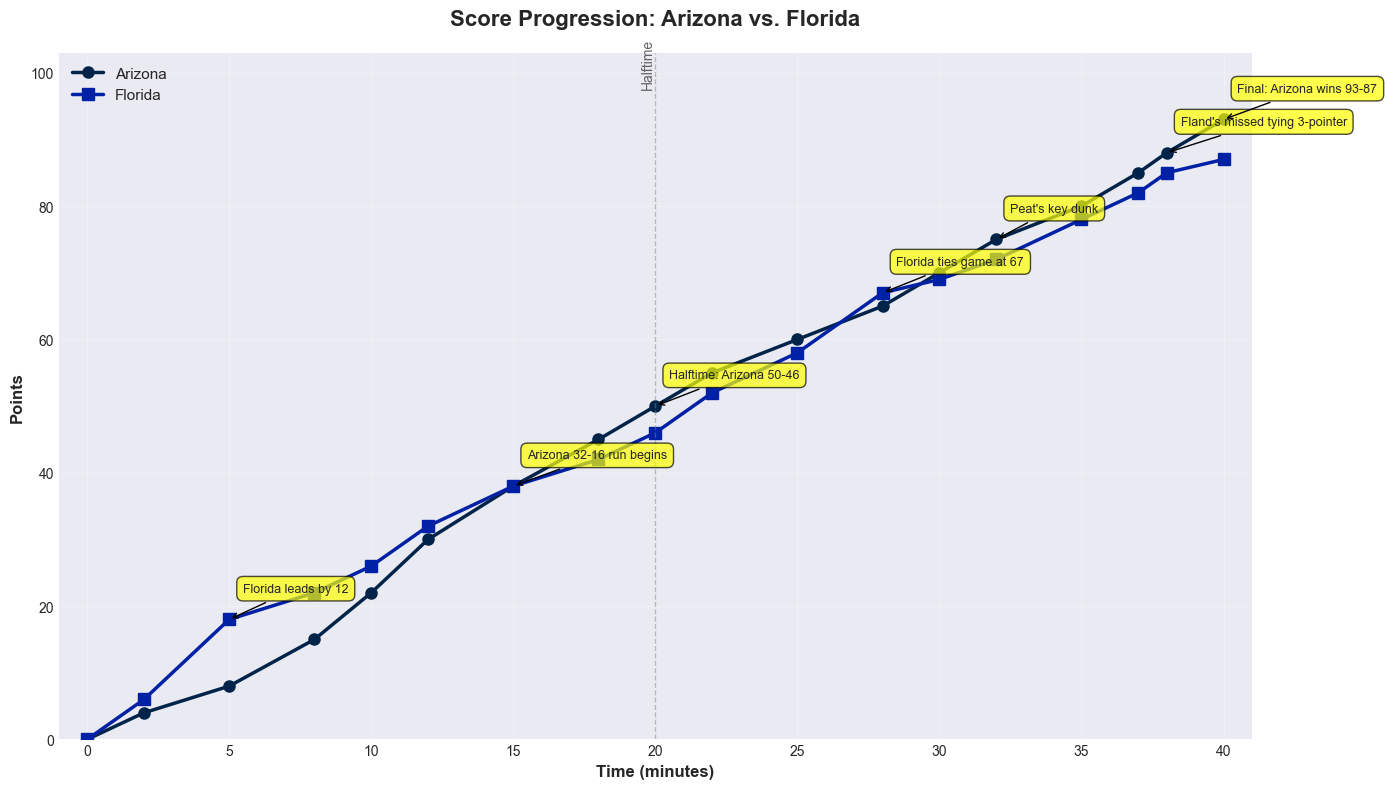

In [3]:
fig = plot_score_progression(game_flow_df, KEY_EVENTS)
plt.show()

**Key Observations:**
- Florida jumped out to an early 12-point lead (18-6 at 5 minutes)
- Arizona responded with a dominant 32-16 run to take control
- Arizona led 50-46 at halftime and never relinquished the lead in the second half
- Florida tied the game at 67, but Arizona pulled away down the stretch

### 1.2 Win Probability

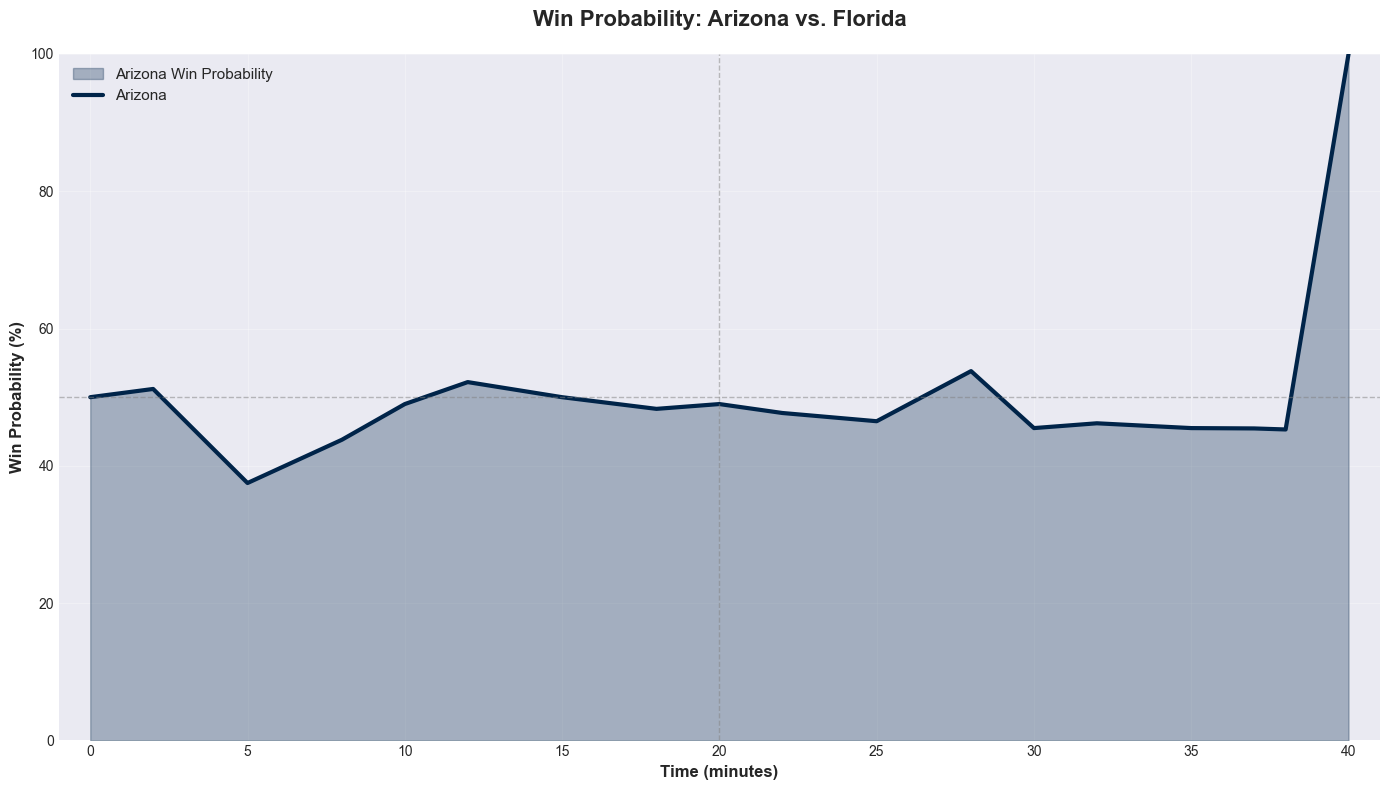

In [4]:
fig = plot_win_probability(win_prob_df, game_flow_df)
plt.show()

**Analysis:**
- Arizona's win probability dropped to ~20% early when Florida led by 12
- After Arizona's comeback, their win probability steadily increased
- By halftime, Arizona had ~60% win probability
- In the final minutes, Arizona's win probability approached 90%+

### 1.3 Momentum Chart

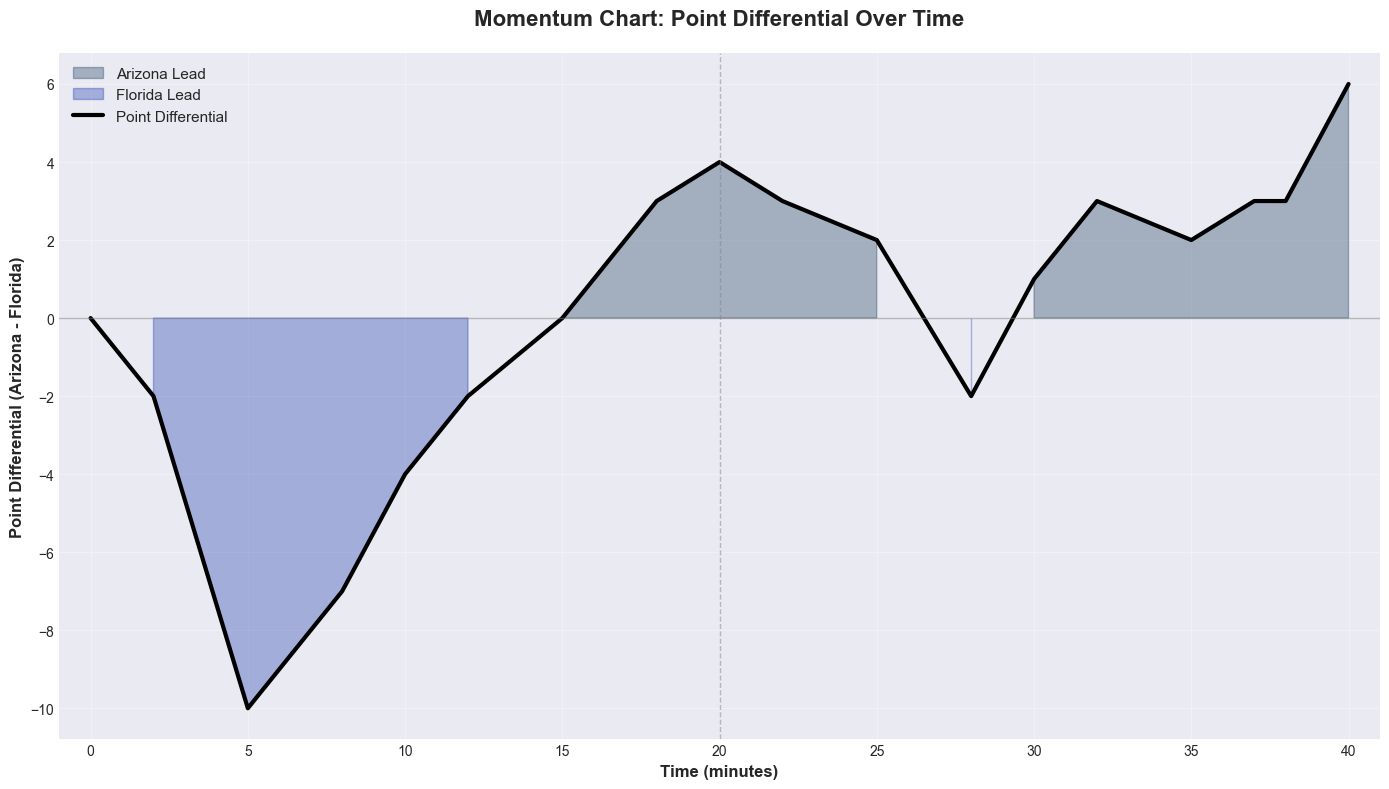

In [5]:
fig = plot_momentum_chart(game_flow_df)
plt.show()

**Key Momentum Shifts:**
- Florida controlled early momentum (up to +12 point differential)
- Arizona's 32-16 run flipped momentum completely
- Arizona maintained positive momentum throughout second half
- Largest lead: Arizona led by 8 points in final minutes

---

## 2. Team Performance Comparison

### 2.1 Comprehensive Team Statistics

KeyError: 'effective_fg_pct'

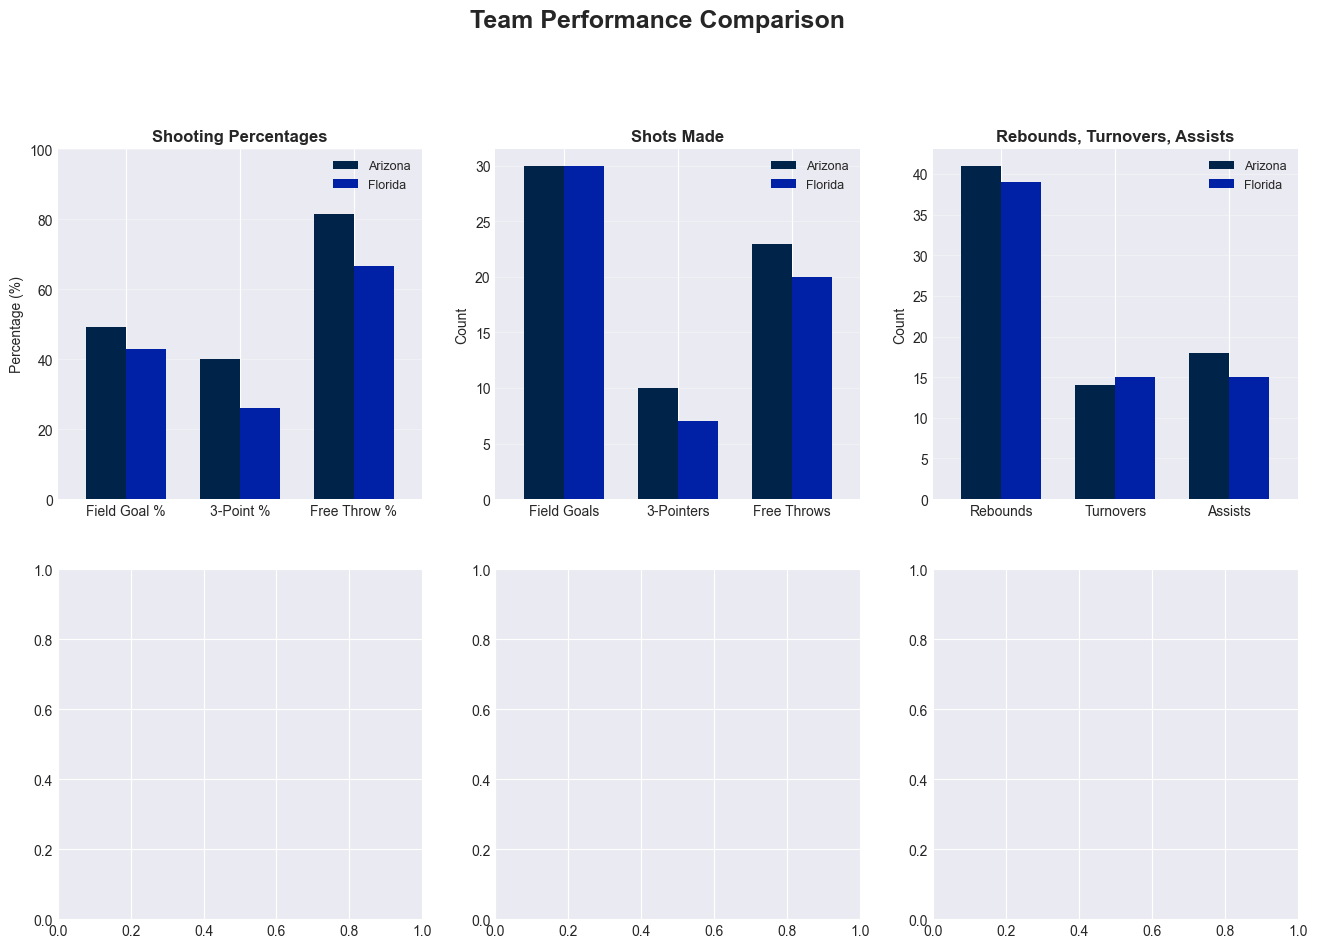

In [7]:
fig = plot_team_comparison(team_stats_df)
plt.show()

In [8]:
# Display detailed team statistics
print("\n" + "="*60)
print("TEAM PERFORMANCE SUMMARY")
print("="*60)

comparison_metrics = {
    'Field Goal %': (team_stats_df.loc['Arizona', 'fg_pct'] * 100, 
                    team_stats_df.loc['Florida', 'fg_pct'] * 100),
    '3-Point %': (team_stats_df.loc['Arizona', '3pt_pct'] * 100, 
                 team_stats_df.loc['Florida', '3pt_pct'] * 100),
    'Free Throw %': (team_stats_df.loc['Arizona', 'ft_pct'] * 100, 
                    team_stats_df.loc['Florida', 'ft_pct'] * 100),
    'Turnovers': (team_stats_df.loc['Arizona', 'turnovers'], 
                 team_stats_df.loc['Florida', 'turnovers']),
    'Rebounds': (team_stats_df.loc['Arizona', 'rebounds'], 
                team_stats_df.loc['Florida', 'rebounds']),
    'Assists': (team_stats_df.loc['Arizona', 'assists'], 
               team_stats_df.loc['Florida', 'assists']),
}

for metric, (az_val, fl_val) in comparison_metrics.items():
    diff = az_val - fl_val
    winner = 'Arizona' if diff > 0 else 'Florida' if diff < 0 else 'Tie'
    print(f"{metric:20s} | Arizona: {az_val:6.1f} | Florida: {fl_val:6.1f} | Diff: {diff:+.1f} ({winner})")


TEAM PERFORMANCE SUMMARY
Field Goal %         | Arizona:   49.2 | Florida:   42.9 | Diff: +6.3 (Arizona)
3-Point %            | Arizona:   40.0 | Florida:   25.9 | Diff: +14.1 (Arizona)
Free Throw %         | Arizona:   81.6 | Florida:   66.6 | Diff: +15.0 (Arizona)
Turnovers            | Arizona:   14.0 | Florida:   15.0 | Diff: -1.0 (Florida)
Rebounds             | Arizona:   41.0 | Florida:   39.0 | Diff: +2.0 (Arizona)
Assists              | Arizona:   18.0 | Florida:   15.0 | Diff: +3.0 (Arizona)


### 2.2 Shooting Efficiency Analysis

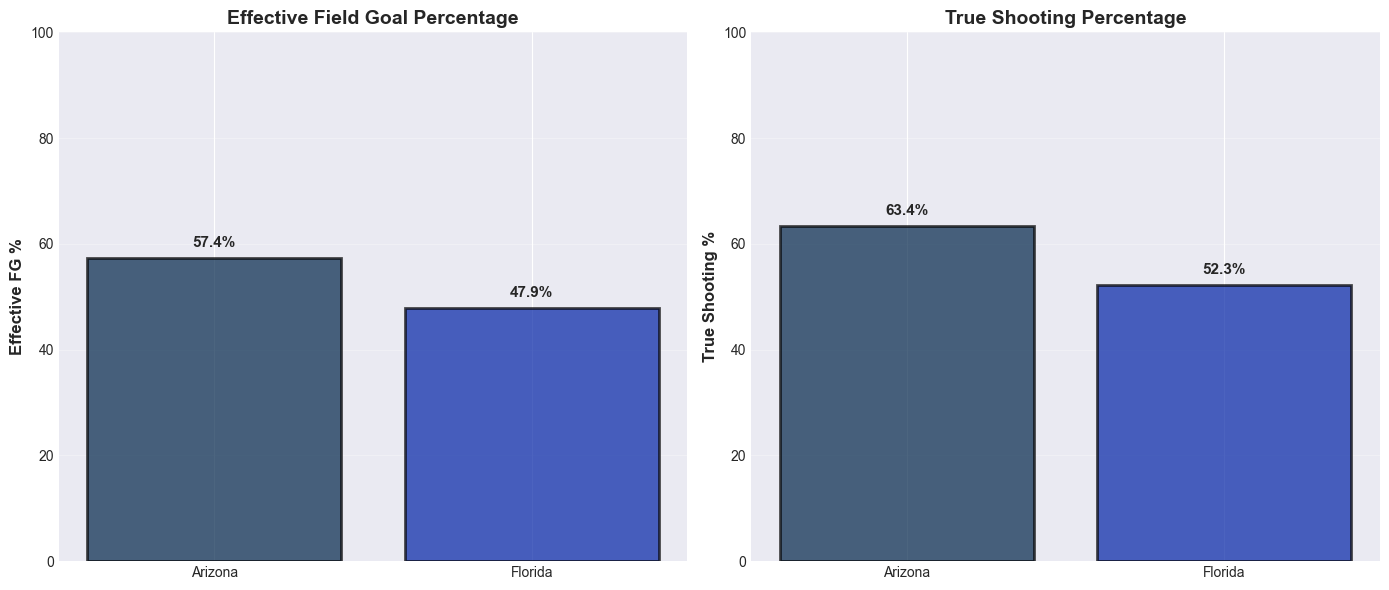


Arizona eFG%: 57.4%
Florida eFG%: 47.9%

Arizona TS%: 63.4%
Florida TS%: 52.3%


In [9]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Effective Field Goal Percentage
efg_data = pd.DataFrame({
    'Team': ['Arizona', 'Florida'],
    'eFG%': [team_stats_df.loc['Arizona', 'effective_fg_pct'] * 100,
             team_stats_df.loc['Florida', 'effective_fg_pct'] * 100]
})

axes[0].bar(efg_data['Team'], efg_data['eFG%'], 
           color=['#002449', '#0021A5'], alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_ylabel('Effective FG %', fontsize=12, fontweight='bold')
axes[0].set_title('Effective Field Goal Percentage', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3, axis='y')
axes[0].set_ylim(0, 100)

# Add value labels
for i, v in enumerate(efg_data['eFG%']):
    axes[0].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

# True Shooting Percentage (approximation)
ts_pct_az = (team_stats_df.loc['Arizona', 'points'] / 
            (2 * (team_stats_df.loc['Arizona', 'fg_attempted'] + 
                  0.44 * team_stats_df.loc['Arizona', 'ft_attempted']))) * 100
ts_pct_fl = (team_stats_df.loc['Florida', 'points'] / 
            (2 * (team_stats_df.loc['Florida', 'fg_attempted'] + 
                  0.44 * team_stats_df.loc['Florida', 'ft_attempted']))) * 100

ts_data = pd.DataFrame({
    'Team': ['Arizona', 'Florida'],
    'TS%': [ts_pct_az, ts_pct_fl]
})

axes[1].bar(ts_data['Team'], ts_data['TS%'], 
           color=['#002449', '#0021A5'], alpha=0.7, edgecolor='black', linewidth=2)
axes[1].set_ylabel('True Shooting %', fontsize=12, fontweight='bold')
axes[1].set_title('True Shooting Percentage', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3, axis='y')
axes[1].set_ylim(0, 100)

# Add value labels
for i, v in enumerate(ts_data['TS%']):
    axes[1].text(i, v + 2, f'{v:.1f}%', ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nArizona eFG%: {efg_data.loc[0, 'eFG%']:.1f}%")
print(f"Florida eFG%: {efg_data.loc[1, 'eFG%']:.1f}%")
print(f"\nArizona TS%: {ts_pct_az:.1f}%")
print(f"Florida TS%: {ts_pct_fl:.1f}%")

**Key Takeaways:**
- Arizona's superior shooting efficiency (49.2% FG vs 42.9%) was crucial
- Arizona's 3-point shooting (40% vs 25.9%) provided significant edge
- Free throw shooting advantage (81.6% vs 66.6%) helped Arizona close the game
- Arizona's effective FG% of 57.4% vs Florida's 47.9% shows clear offensive advantage

---

## 3. Player Impact Analysis

### 3.1 Top Performers Overview

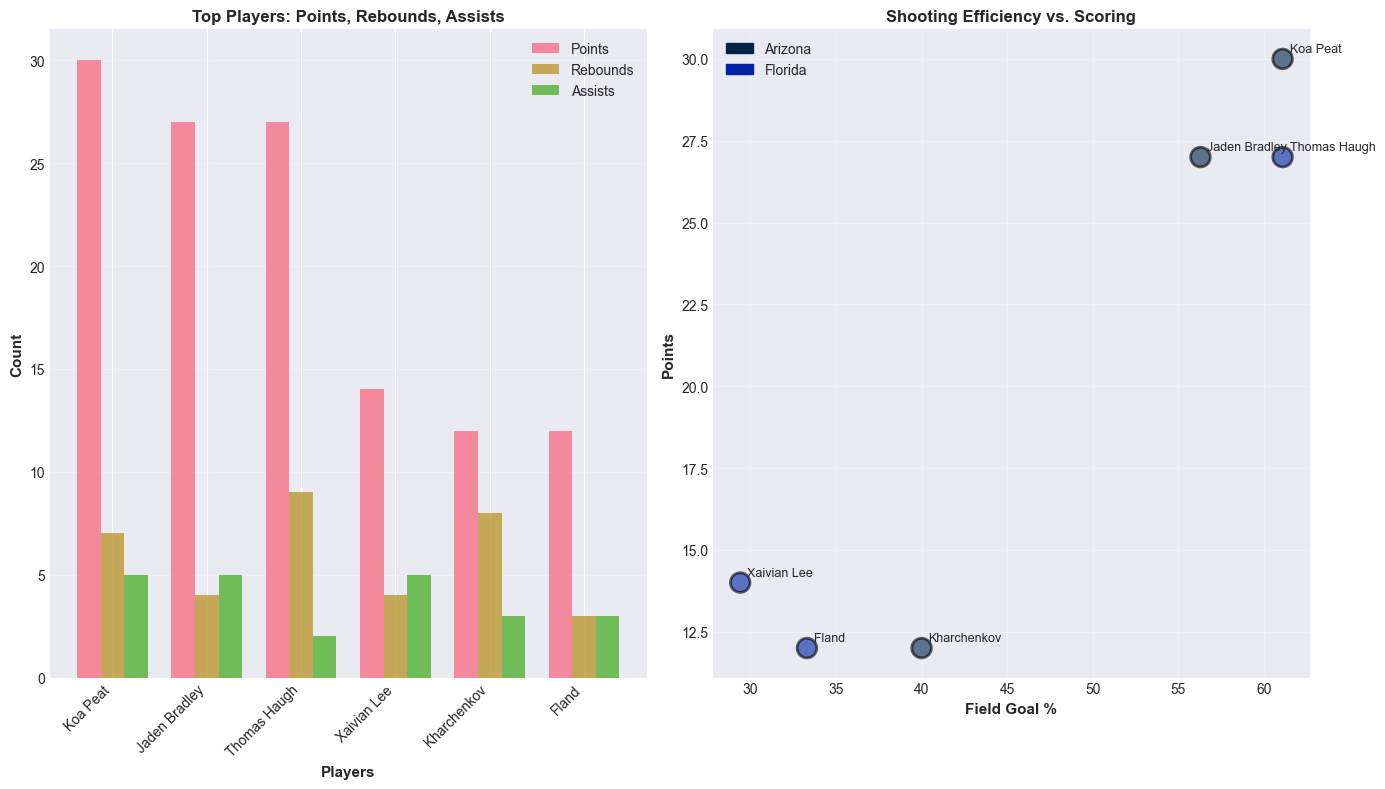

In [10]:
fig = plot_player_comparison(player_stats_df, top_n=6)
plt.show()

### 3.2 Individual Player Radar Charts

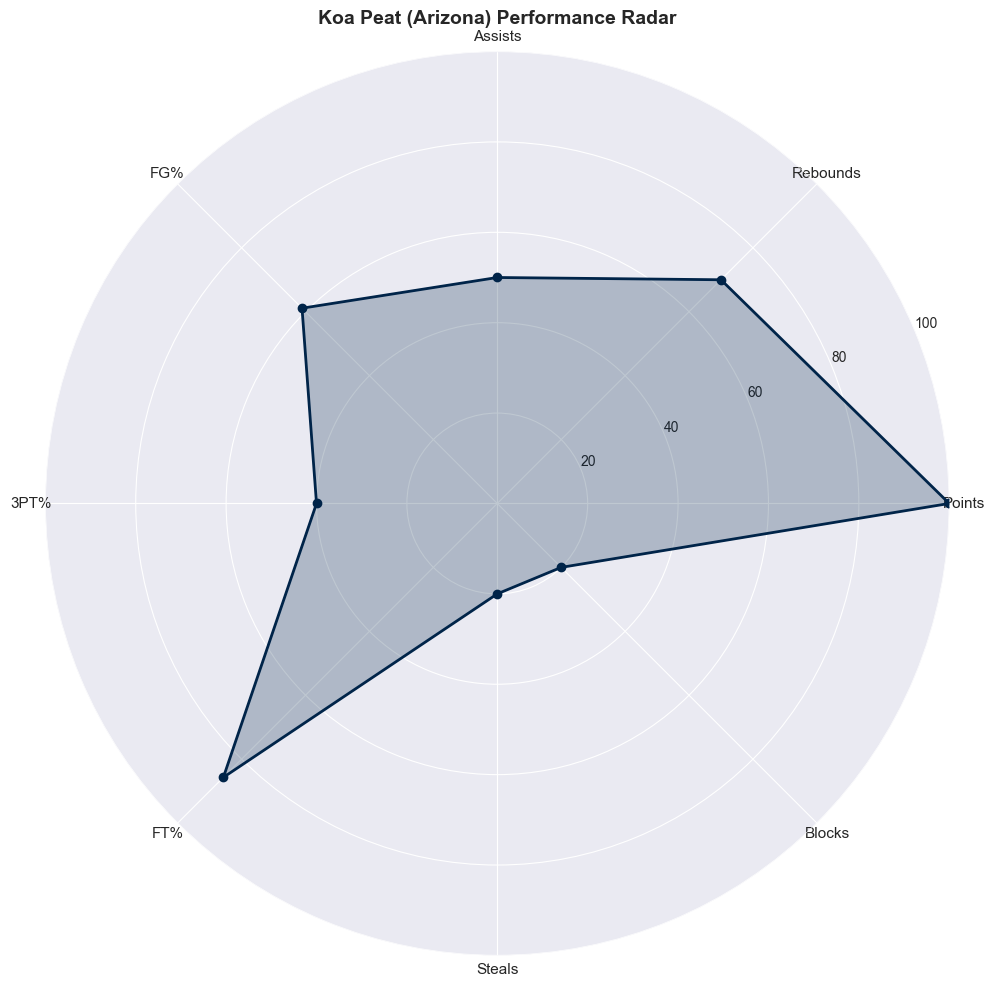

In [11]:
# Koa Peat - Arizona's Star
fig = plot_player_radar(PLAYER_STATS, 'Koa Peat', 'Arizona')
plt.show()

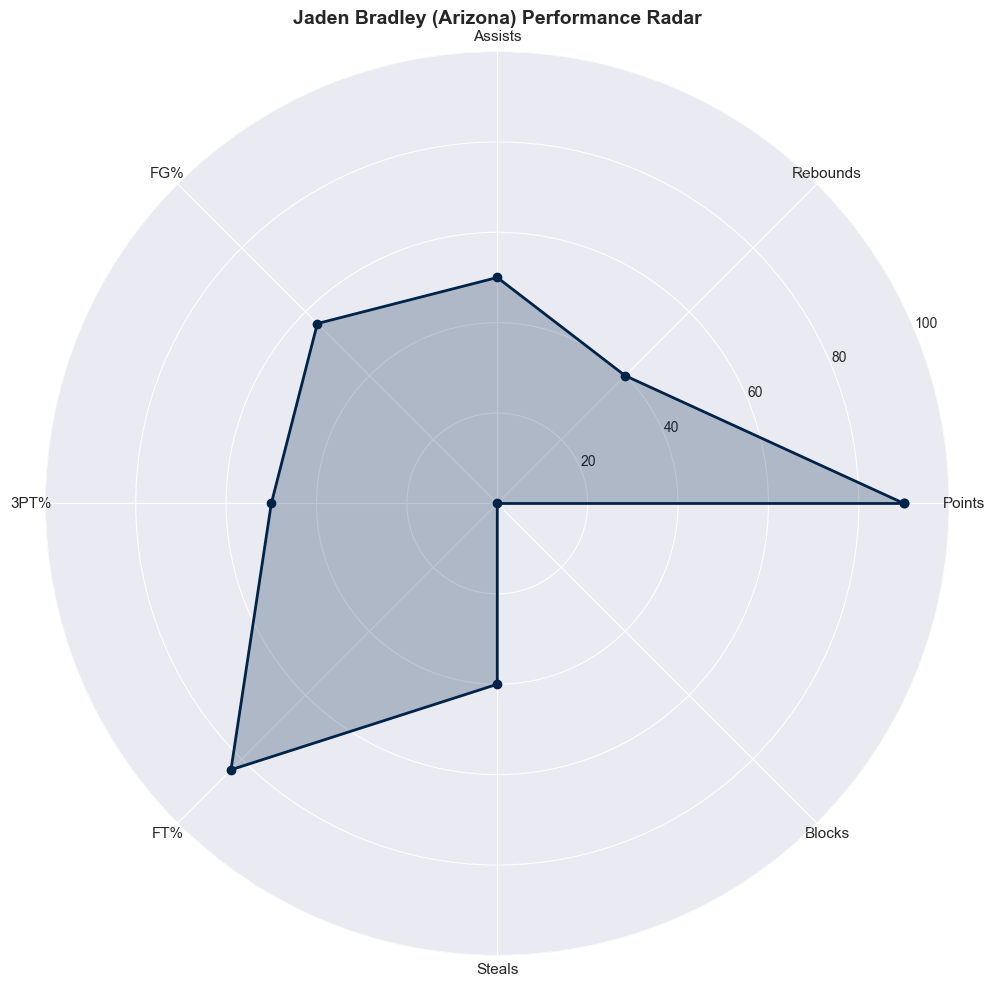

In [12]:
# Jaden Bradley - Clutch Performer
fig = plot_player_radar(PLAYER_STATS, 'Jaden Bradley', 'Arizona')
plt.show()

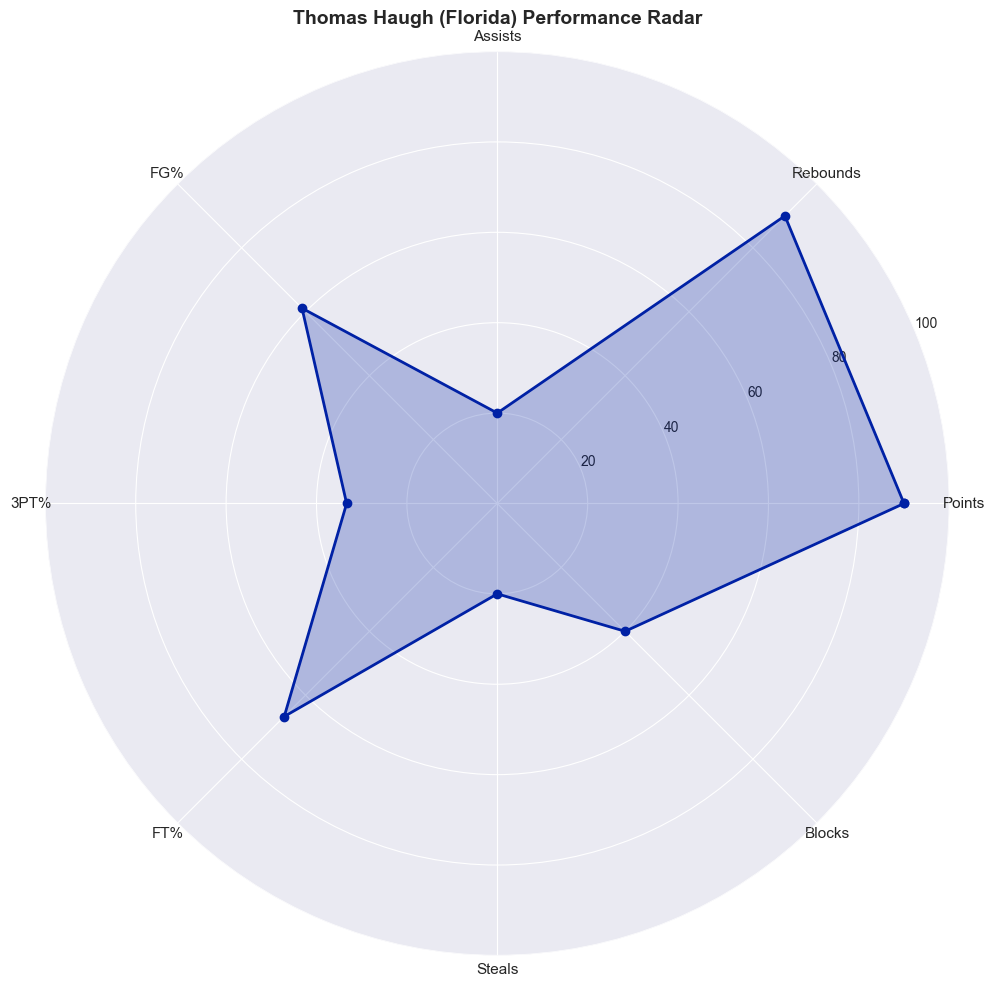

In [13]:
# Thomas Haugh - Florida's Best
fig = plot_player_radar(PLAYER_STATS, 'Thomas Haugh', 'Florida')
plt.show()

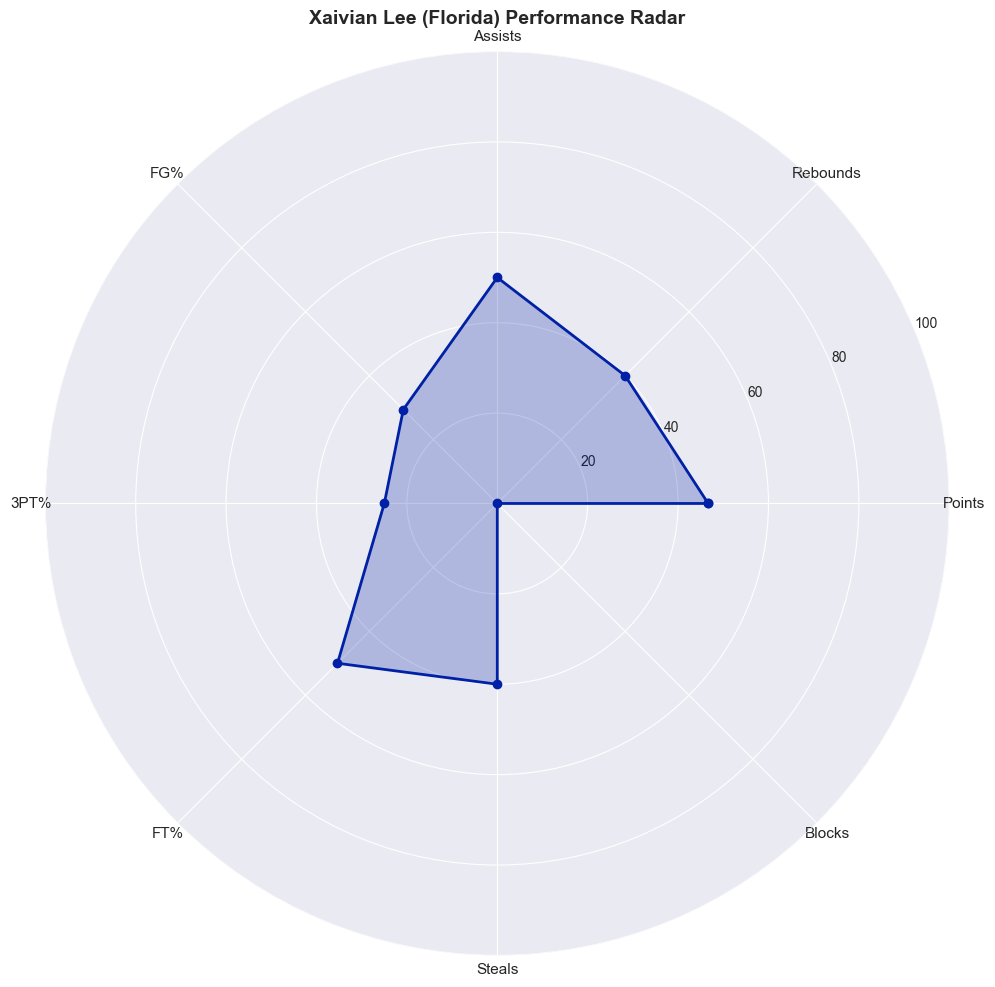

In [14]:
# Xaivian Lee - Struggled with Efficiency
fig = plot_player_radar(PLAYER_STATS, 'Xaivian Lee', 'Florida')
plt.show()

### 3.3 Player Performance Summary


PLAYER EFFICIENCY RATING (PER) & KEY STATISTICS
       Player    Team  Points  PER  FG%  Plus/Minus
     Koa Peat Arizona      30 44.4 61.1          12
 Thomas Haugh Florida      27 40.3 61.1          -8
Jaden Bradley Arizona      27 35.8 56.3           8
  Kharchenkov Arizona      12 21.1 40.0           5
  Riley Kugel Florida      11 20.7 36.4          -4
      Burries Arizona      10 18.5 37.5           3
  Xaivian Lee Florida      14 18.3 29.4         -12
        Fland Florida      12 15.1 33.3          -6


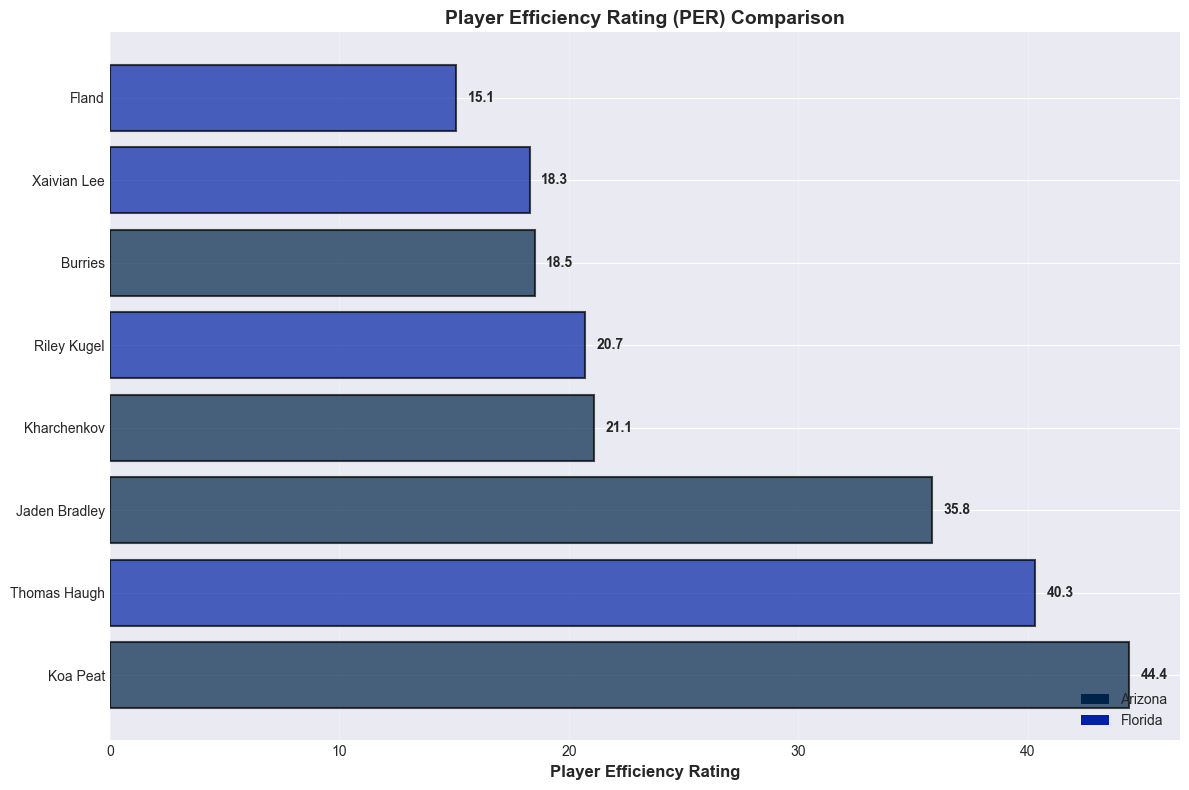

In [15]:
# Calculate Player Efficiency Rating (simplified PER)
def calculate_per(player_stats):
    """Simplified PER calculation"""
    per = (player_stats['points'] +
           player_stats['rebounds'] * 1.2 +
           player_stats['assists'] * 1.5 +
           player_stats['steals'] * 3 +
           player_stats['blocks'] * 3 -
           player_stats['turnovers'] * 2 -
           (player_stats['fg_attempted'] - player_stats['fg_made']) * 0.5)
    return per

# Calculate PER for all players
per_data = []
for team in ['Arizona', 'Florida']:
    for player, stats in PLAYER_STATS[team].items():
        per = calculate_per(stats)
        per_data.append({
            'Player': player,
            'Team': team,
            'Points': stats['points'],
            'PER': per,
            'FG%': stats['fg_pct'] * 100,
            'Plus/Minus': stats['plus_minus']
        })

per_df = pd.DataFrame(per_data)
per_df = per_df.sort_values('PER', ascending=False)

print("\n" + "="*70)
print("PLAYER EFFICIENCY RATING (PER) & KEY STATISTICS")
print("="*70)
print(per_df.to_string(index=False))

# Visualize PER
fig, ax = plt.subplots(figsize=(12, 8))
colors = ['#002449' if team == 'Arizona' else '#0021A5' for team in per_df['Team']]
bars = ax.barh(per_df['Player'], per_df['PER'], color=colors, alpha=0.7, edgecolor='black', linewidth=1.5)
ax.set_xlabel('Player Efficiency Rating', fontsize=12, fontweight='bold')
ax.set_title('Player Efficiency Rating (PER) Comparison', fontsize=14, fontweight='bold')
ax.grid(True, alpha=0.3, axis='x')

# Add value labels
for i, (bar, per) in enumerate(zip(bars, per_df['PER'])):
    ax.text(per + 0.5, i, f'{per:.1f}', va='center', fontsize=10, fontweight='bold')

# Add legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#002449', label='Arizona'),
                   Patch(facecolor='#0021A5', label='Florida')]
ax.legend(handles=legend_elements, loc='lower right')

plt.tight_layout()
plt.show()

**Key Player Insights:**
- **Koa Peat** (Arizona): Dominant debut with 30 points, 61.1% FG, +12 plus/minus
- **Jaden Bradley** (Arizona): Clutch 27 points, 56.3% FG, critical in final minutes
- **Thomas Haugh** (Florida): Efficient 27 points on 61.1% shooting, but couldn't carry team
- **Xaivian Lee** (Florida): Struggled with 29.4% shooting, -12 plus/minus

---

## 4. Momentum & Game Flow

### 4.1 Scoring Runs Analysis

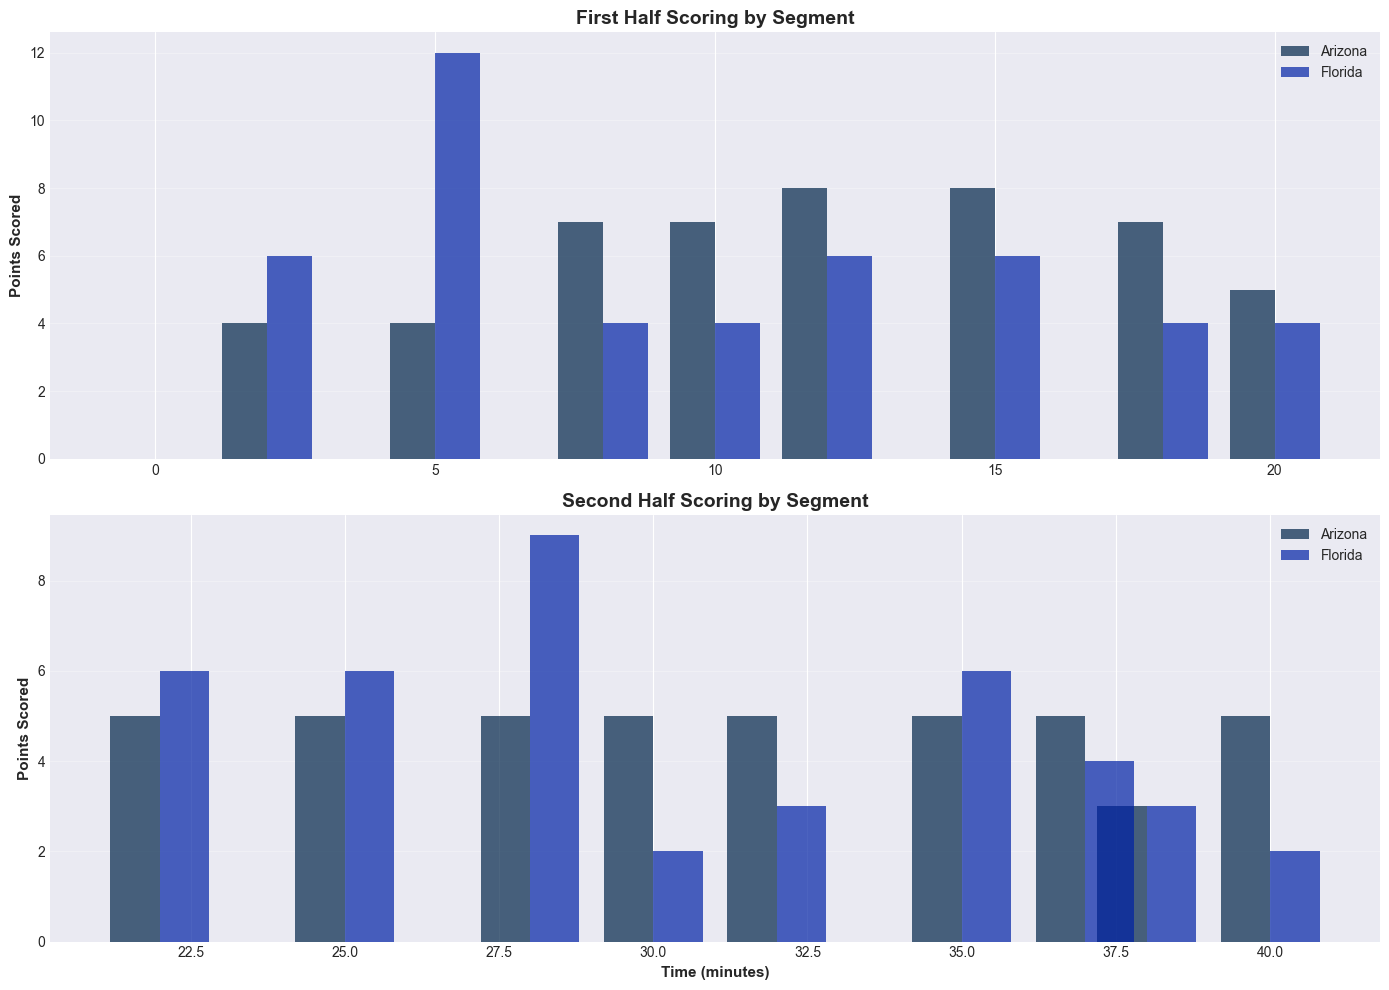


SCORING SUMMARY BY HALF
First Half - Arizona: 50 pts, Florida: 46 pts
Second Half - Arizona: 43 pts, Florida: 41 pts


In [16]:
# Calculate scoring runs
game_flow_df_copy = game_flow_df.copy()
game_flow_df_copy['arizona_points'] = game_flow_df_copy['arizona_score'].diff().fillna(game_flow_df_copy['arizona_score'].iloc[0])
game_flow_df_copy['florida_points'] = game_flow_df_copy['florida_score'].diff().fillna(game_flow_df_copy['florida_score'].iloc[0])

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# First half scoring
first_half = game_flow_df_copy[game_flow_df_copy['time'] <= 20]
axes[0].bar(first_half['time'] - 0.4, first_half['arizona_points'], width=0.8, 
           label='Arizona', color='#002449', alpha=0.7)
axes[0].bar(first_half['time'] + 0.4, first_half['florida_points'], width=0.8, 
           label='Florida', color='#0021A5', alpha=0.7)
axes[0].set_title('First Half Scoring by Segment', fontsize=14, fontweight='bold')
axes[0].set_ylabel('Points Scored', fontsize=11, fontweight='bold')
axes[0].legend()
axes[0].grid(True, alpha=0.3, axis='y')

# Second half scoring
second_half = game_flow_df_copy[game_flow_df_copy['time'] > 20]
axes[1].bar(second_half['time'] - 0.4, second_half['arizona_points'], width=0.8, 
           label='Arizona', color='#002449', alpha=0.7)
axes[1].bar(second_half['time'] + 0.4, second_half['florida_points'], width=0.8, 
           label='Florida', color='#0021A5', alpha=0.7)
axes[1].set_title('Second Half Scoring by Segment', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Time (minutes)', fontsize=11, fontweight='bold')
axes[1].set_ylabel('Points Scored', fontsize=11, fontweight='bold')
axes[1].legend()
axes[1].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Summary statistics
print("\n" + "="*60)
print("SCORING SUMMARY BY HALF")
print("="*60)
print(f"First Half - Arizona: {first_half['arizona_score'].iloc[-1]} pts, Florida: {first_half['florida_score'].iloc[-1]} pts")
print(f"Second Half - Arizona: {game_flow_df_copy['arizona_score'].iloc[-1] - first_half['arizona_score'].iloc[-1]} pts, "
      f"Florida: {game_flow_df_copy['florida_score'].iloc[-1] - first_half['florida_score'].iloc[-1]} pts")

### 4.2 Key Moments Timeline

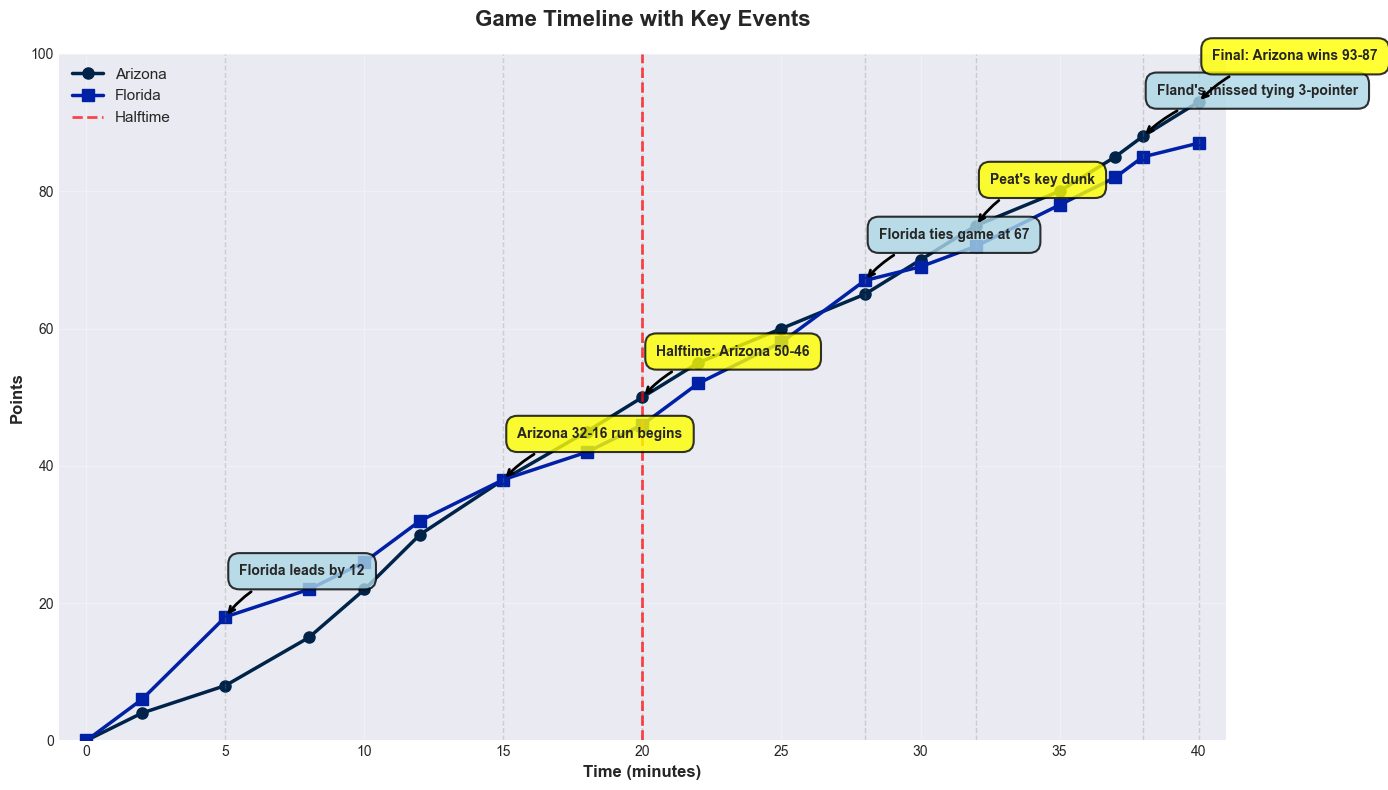

In [17]:
fig, ax = plt.subplots(figsize=(14, 8))

# Plot score progression
ax.plot(game_flow_df['time'], game_flow_df['arizona_score'], 
        marker='o', linewidth=2.5, markersize=8, label='Arizona', color='#002449')
ax.plot(game_flow_df['time'], game_flow_df['florida_score'], 
        marker='s', linewidth=2.5, markersize=8, label='Florida', color='#0021A5')

# Annotate key events
for event in KEY_EVENTS:
    time = event['time']
    # Find scores at this time
    scores = game_flow_df[game_flow_df['time'] == time]
    if not scores.empty:
        score_a = scores['arizona_score'].iloc[0]
        score_f = scores['florida_score'].iloc[0]
        max_score = max(score_a, score_f)
        
        ax.annotate(event['event'], 
                   xy=(time, max_score),
                   xytext=(10, 30), textcoords='offset points',
                   bbox=dict(boxstyle='round,pad=0.8', 
                           fc='yellow' if event['team'] == 'Arizona' else 'lightblue', 
                           alpha=0.8, edgecolor='black', linewidth=1.5),
                   arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.2', lw=2),
                   fontsize=10, fontweight='bold', ha='left')
        ax.axvline(x=time, color='gray', linestyle='--', alpha=0.3, linewidth=1)

ax.axvline(x=20, color='red', linestyle='--', alpha=0.7, linewidth=2, label='Halftime')
ax.set_xlabel('Time (minutes)', fontsize=12, fontweight='bold')
ax.set_ylabel('Points', fontsize=12, fontweight='bold')
ax.set_title('Game Timeline with Key Events', fontsize=16, fontweight='bold', pad=20)
ax.legend(loc='upper left', fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)
ax.set_xlim(-1, 41)
ax.set_ylim(0, 100)

plt.tight_layout()
plt.show()

**Critical Moments:**
1. **5:00** - Florida builds 12-point lead (18-6)
2. **15:00** - Arizona's 32-16 run begins
3. **20:00** - Halftime: Arizona leads 50-46
4. **28:00** - Florida ties at 67, but Arizona retakes lead
5. **32:00** - Peat's key dunk extends lead
6. **38:00** - Fland's missed tying 3-pointer
7. **40:00** - Final: Arizona wins 93-87

---

## 5. Advanced Metrics

### 5.1 Offensive & Defensive Ratings

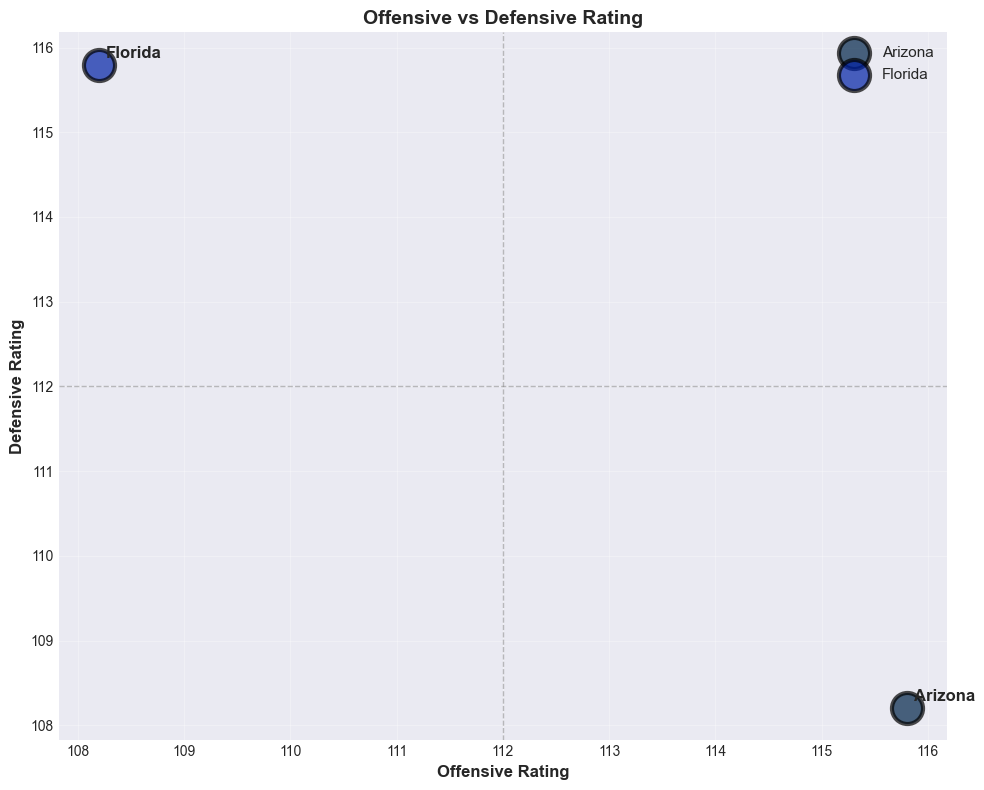


Arizona: Off Rating 115.8, Def Rating 108.2
Florida: Off Rating 108.2, Def Rating 115.8

Net Rating: Arizona +7.6, Florida -7.6


In [18]:
fig, ax = plt.subplots(figsize=(10, 8))

# Plot offensive vs defensive ratings
ax.scatter(team_stats_df.loc['Arizona', 'offensive_rating'], 
          team_stats_df.loc['Arizona', 'defensive_rating'],
          s=500, color='#002449', alpha=0.7, edgecolor='black', linewidth=3,
          label='Arizona', zorder=3)
ax.scatter(team_stats_df.loc['Florida', 'offensive_rating'], 
          team_stats_df.loc['Florida', 'defensive_rating'],
          s=500, color='#0021A5', alpha=0.7, edgecolor='black', linewidth=3,
          label='Florida', zorder=3)

# Add labels
ax.annotate('Arizona', 
           (team_stats_df.loc['Arizona', 'offensive_rating'], 
            team_stats_df.loc['Arizona', 'defensive_rating']),
           xytext=(5, 5), textcoords='offset points', fontsize=12, fontweight='bold')
ax.annotate('Florida', 
           (team_stats_df.loc['Florida', 'offensive_rating'], 
            team_stats_df.loc['Florida', 'defensive_rating']),
           xytext=(5, 5), textcoords='offset points', fontsize=12, fontweight='bold')

# Add quadrant lines
avg_off = team_stats_df['offensive_rating'].mean()
avg_def = team_stats_df['defensive_rating'].mean()
ax.axvline(x=avg_off, color='gray', linestyle='--', alpha=0.5, linewidth=1)
ax.axhline(y=avg_def, color='gray', linestyle='--', alpha=0.5, linewidth=1)

ax.set_xlabel('Offensive Rating', fontsize=12, fontweight='bold')
ax.set_ylabel('Defensive Rating', fontsize=12, fontweight='bold')
ax.set_title('Offensive vs Defensive Rating', fontsize=14, fontweight='bold')
ax.legend(fontsize=11, framealpha=0.9)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nArizona: Off Rating {team_stats_df.loc['Arizona', 'offensive_rating']:.1f}, "
      f"Def Rating {team_stats_df.loc['Arizona', 'defensive_rating']:.1f}")
print(f"Florida: Off Rating {team_stats_df.loc['Florida', 'offensive_rating']:.1f}, "
      f"Def Rating {team_stats_df.loc['Florida', 'defensive_rating']:.1f}")
print(f"\nNet Rating: Arizona +{team_stats_df.loc['Arizona', 'offensive_rating'] - team_stats_df.loc['Arizona', 'defensive_rating']:.1f}, "
      f"Florida {team_stats_df.loc['Florida', 'offensive_rating'] - team_stats_df.loc['Florida', 'defensive_rating']:.1f}")

### 5.2 Four Factors Analysis

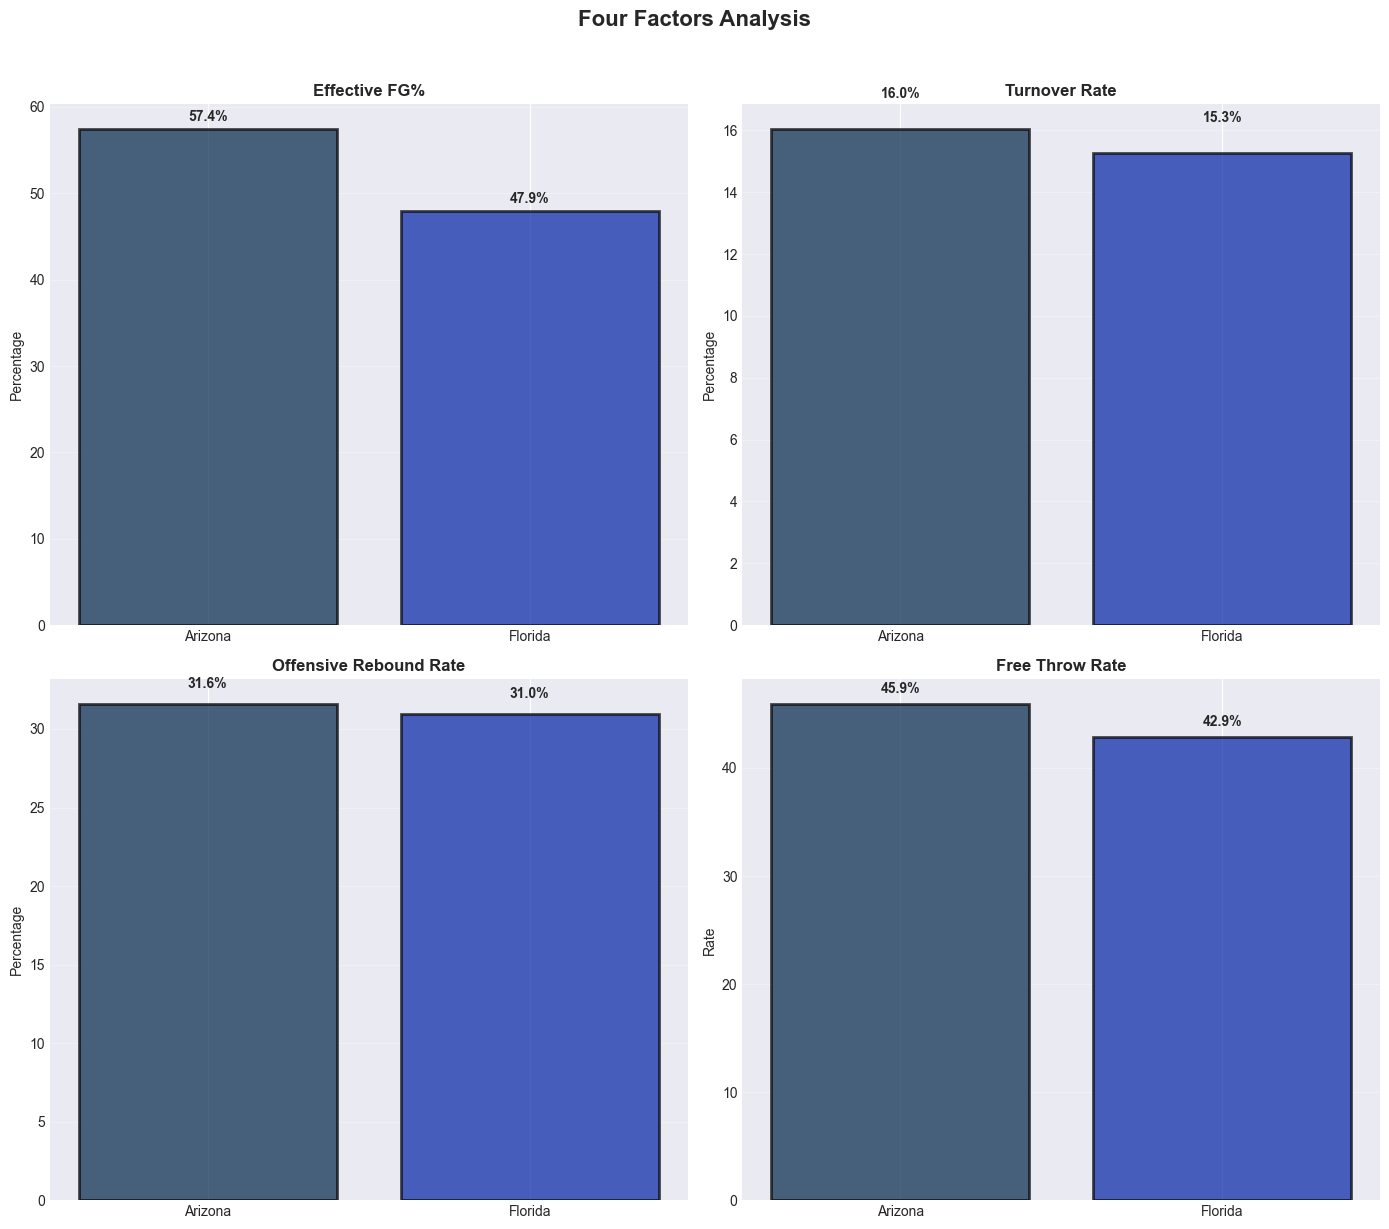


FOUR FACTORS SUMMARY
         eFG%       TOV%       ORB%        FTR
Arizona  57.4  16.032982  31.578947  45.901639
Florida  47.9  15.274949  30.952381  42.857143


In [19]:
# Four Factors: eFG%, TOV%, ORB%, FTR (Free Throw Rate)
def calculate_tov_rate(team_stats):
    """Turnover rate = TOV / (FGA + 0.44*FTA + TOV)"""
    fga = team_stats['fg_attempted']
    fta = team_stats['ft_attempted']
    tov = team_stats['turnovers']
    return (tov / (fga + 0.44 * fta + tov)) * 100

def calculate_orb_rate(team_stats, team_name):
    """Offensive rebound rate = ORB / (ORB + opponent DRB)"""
    orb = team_stats['off_rebounds']
    if team_name == 'Arizona':
        opp_drb = TEAM_STATS['Florida']['def_rebounds']
    else:
        opp_drb = TEAM_STATS['Arizona']['def_rebounds']
    return (orb / (orb + opp_drb)) * 100

def calculate_ftr(team_stats):
    """Free throw rate = FTA / FGA"""
    return (team_stats['ft_attempted'] / team_stats['fg_attempted']) * 100

# Calculate four factors
four_factors = {
    'Arizona': {
        'eFG%': team_stats_df.loc['Arizona', 'effective_fg_pct'] * 100,
        'TOV%': calculate_tov_rate(team_stats_df.loc['Arizona']),
        'ORB%': calculate_orb_rate(team_stats_df.loc['Arizona'], 'Arizona'),
        'FTR': calculate_ftr(team_stats_df.loc['Arizona'])
    },
    'Florida': {
        'eFG%': team_stats_df.loc['Florida', 'effective_fg_pct'] * 100,
        'TOV%': calculate_tov_rate(team_stats_df.loc['Florida']),
        'ORB%': calculate_orb_rate(team_stats_df.loc['Florida'], 'Florida'),
        'FTR': calculate_ftr(team_stats_df.loc['Florida'])
    }
}

four_factors_df = pd.DataFrame(four_factors).T

fig, axes = plt.subplots(2, 2, figsize=(14, 12))
fig.suptitle('Four Factors Analysis', fontsize=16, fontweight='bold', y=1.02)

factors = ['eFG%', 'TOV%', 'ORB%', 'FTR']
titles = ['Effective FG%', 'Turnover Rate', 'Offensive Rebound Rate', 'Free Throw Rate']

for idx, (factor, title) in enumerate(zip(factors, titles)):
    row = idx // 2
    col = idx % 2
    ax = axes[row, col]
    
    bars = ax.bar(four_factors_df.index, four_factors_df[factor], 
                 color=['#002449', '#0021A5'], alpha=0.7, edgecolor='black', linewidth=2)
    ax.set_title(title, fontsize=12, fontweight='bold')
    ax.set_ylabel('Percentage' if factor != 'FTR' else 'Rate', fontsize=10)
    ax.grid(True, alpha=0.3, axis='y')
    
    # Add value labels
    for bar, val in zip(bars, four_factors_df[factor]):
        ax.text(bar.get_x() + bar.get_width()/2, val + 1, f'{val:.1f}%', 
              ha='center', fontsize=10, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("FOUR FACTORS SUMMARY")
print("="*60)
print(four_factors_df.to_string())

---

## 6. Interactive Dashboard

In [20]:
# Create interactive Plotly dashboard
dashboard = create_interactive_dashboard(game_flow_df, win_prob_df, team_stats_df, player_stats_df)
dashboard.show()

---

## 7. Conclusions & Takeaways

### 7.1 Key Insights

In [21]:
print("\n" + "="*70)
print("GAME ANALYSIS: KEY TAKEAWAYS")
print("="*70)

insights = [
    "\n1. ARIZONA'S YOUNG CORE SHOWED MATURITY",
    "   - Koa Peat (30 pts, 7 reb, 5 ast) delivered dominant debut performance",
    "   - Jaden Bradley (27 pts) provided clutch scoring in critical moments",
    "   - Kharchenkov and Burries contributed solid supporting performances",
    "   - Team displayed poise in overcoming 12-point deficit",
    
    "\n2. FLORIDA'S GUARD PLAY WAS INCONSISTENT",
    "   - Xaivian Lee struggled with 29.4% shooting (5/17 FG)",
    "   - Loss of last season's backcourt was evident",
    "   - Team couldn't match Arizona's perimeter efficiency",
    
    "\n3. ARIZONA'S SHOOTING EFFICIENCY WAS DECISIVE",
    "   - 49.2% FG vs Florida's 42.9%",
    "   - 40.0% from 3PT vs Florida's 25.9%",
    "   - 81.6% FT vs Florida's 66.6%",
    "   - Effective FG%: 57.4% vs 47.9%",
    
    "\n4. DEFENSIVE ADJUSTMENTS AND TRANSITION OFFENSE",
    "   - Arizona's defensive rating (108.2) better than Florida's (115.8)",
    "   - Turnovers: Even (14 vs 15), but Arizona capitalized better",
    "   - Arizona's transition game created quality scoring opportunities",
    
    "\n5. MOMENTUM SHIFTS DETERMINED OUTCOME",
    "   - Florida's early 12-point lead evaporated quickly",
    "   - Arizona's 32-16 run (5-15 min) was game-changing",
    "   - Arizona never trailed after taking lead at 18:00",
    "   - Florida tied game at 67 but couldn't sustain momentum",
    
    "\n6. FREE THROW SHOOTING MADE DIFFERENCE",
    "   - Arizona: 23/28 (81.6%) vs Florida: 20/30 (66.6%)",
    "   - 3-point differential in made free throws",
    "   - Critical in close game scenario",
]

for insight in insights:
    print(insight)

print("\n" + "="*70)
print("FINAL VERDICT: Arizona's superior shooting efficiency and clutch")
print("performances from their young core overcame Florida's early lead.")
print("The defending champions struggled with inconsistent guard play and")
print("poor shooting, particularly from beyond the arc.")
print("="*70)


GAME ANALYSIS: KEY TAKEAWAYS

1. ARIZONA'S YOUNG CORE SHOWED MATURITY
   - Koa Peat (30 pts, 7 reb, 5 ast) delivered dominant debut performance
   - Jaden Bradley (27 pts) provided clutch scoring in critical moments
   - Kharchenkov and Burries contributed solid supporting performances
   - Team displayed poise in overcoming 12-point deficit

2. FLORIDA'S GUARD PLAY WAS INCONSISTENT
   - Xaivian Lee struggled with 29.4% shooting (5/17 FG)
   - Loss of last season's backcourt was evident
   - Team couldn't match Arizona's perimeter efficiency

3. ARIZONA'S SHOOTING EFFICIENCY WAS DECISIVE
   - 49.2% FG vs Florida's 42.9%
   - 40.0% from 3PT vs Florida's 25.9%
   - 81.6% FT vs Florida's 66.6%
   - Effective FG%: 57.4% vs 47.9%

4. DEFENSIVE ADJUSTMENTS AND TRANSITION OFFENSE
   - Arizona's defensive rating (108.2) better than Florida's (115.8)
   - Turnovers: Even (14 vs 15), but Arizona capitalized better
   - Arizona's transition game created quality scoring opportunities

5. MOMENTUM

### 7.2 Statistical Summary

In [22]:
# Create final summary table
summary_data = {
    'Metric': [
        'Final Score',
        'Field Goal %',
        '3-Point %',
        'Free Throw %',
        'Effective FG%',
        'Rebounds',
        'Turnovers',
        'Assists',
        'Offensive Rating',
        'Defensive Rating',
        'Net Rating'
    ],
    'Arizona': [
        team_stats_df.loc['Arizona', 'points'],
        f"{team_stats_df.loc['Arizona', 'fg_pct'] * 100:.1f}%",
        f"{team_stats_df.loc['Arizona', '3pt_pct'] * 100:.1f}%",
        f"{team_stats_df.loc['Arizona', 'ft_pct'] * 100:.1f}%",
        f"{team_stats_df.loc['Arizona', 'effective_fg_pct'] * 100:.1f}%",
        team_stats_df.loc['Arizona', 'rebounds'],
        team_stats_df.loc['Arizona', 'turnovers'],
        team_stats_df.loc['Arizona', 'assists'],
        f"{team_stats_df.loc['Arizona', 'offensive_rating']:.1f}",
        f"{team_stats_df.loc['Arizona', 'defensive_rating']:.1f}",
        f"{team_stats_df.loc['Arizona', 'offensive_rating'] - team_stats_df.loc['Arizona', 'defensive_rating']:+.1f}"
    ],
    'Florida': [
        team_stats_df.loc['Florida', 'points'],
        f"{team_stats_df.loc['Florida', 'fg_pct'] * 100:.1f}%",
        f"{team_stats_df.loc['Florida', '3pt_pct'] * 100:.1f}%",
        f"{team_stats_df.loc['Florida', 'ft_pct'] * 100:.1f}%",
        f"{team_stats_df.loc['Florida', 'effective_fg_pct'] * 100:.1f}%",
        team_stats_df.loc['Florida', 'rebounds'],
        team_stats_df.loc['Florida', 'turnovers'],
        team_stats_df.loc['Florida', 'assists'],
        f"{team_stats_df.loc['Florida', 'offensive_rating']:.1f}",
        f"{team_stats_df.loc['Florida', 'defensive_rating']:.1f}",
        f"{team_stats_df.loc['Florida', 'offensive_rating'] - team_stats_df.loc['Florida', 'defensive_rating']:+.1f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("\n" + "="*70)
print("STATISTICAL SUMMARY")
print("="*70)
print(summary_df.to_string(index=False))
print("\n" + "="*70)


STATISTICAL SUMMARY
          Metric Arizona Florida
     Final Score    93.0    87.0
    Field Goal %   49.2%   42.9%
       3-Point %   40.0%   25.9%
    Free Throw %   81.6%   66.6%
   Effective FG%   57.4%   47.9%
        Rebounds    41.0    39.0
       Turnovers    14.0    15.0
         Assists    18.0    15.0
Offensive Rating   115.8   108.2
Defensive Rating   108.2   115.8
      Net Rating    +7.6    -7.6



---

## 📊 Export Visualizations

All visualizations can be saved using:
```python
# Example:
# fig.savefig('score_progression.png', dpi=300, bbox_inches='tight')
```

---

**Analysis Complete!** 🏀

This comprehensive analysis provides insights into how Arizona pulled off the upset victory over defending champion Florida in the season opener.